In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/bank-full.csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


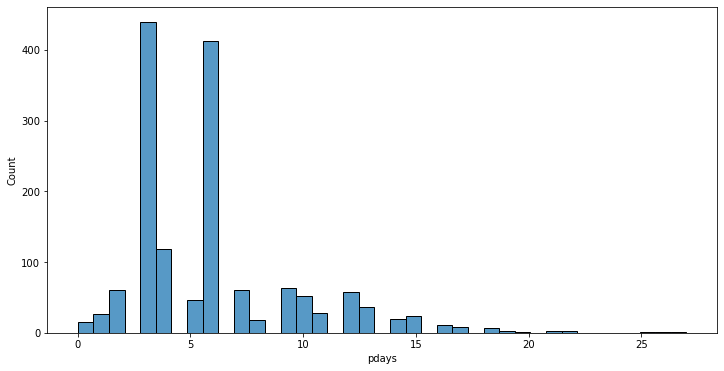

In [6]:
plt.figure(figsize=(12,6))
sns.histplot(data=df[df['pdays'] != 999], x='pdays');

#insteed data=df[df['pdays'] != 999] можно plt.xlim(0, 100)

In [7]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [8]:
df['duration']

0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 41188, dtype: int64

(0.0, 1000.0)

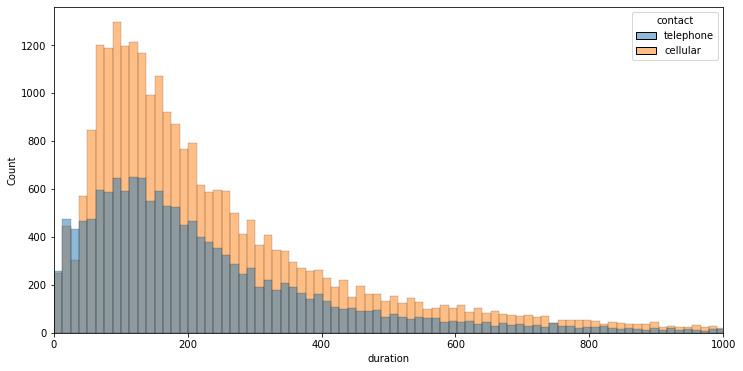

In [9]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='duration', hue='contact');

plt.xlim(0, 1000)

<AxesSubplot:xlabel='contact', ylabel='count'>

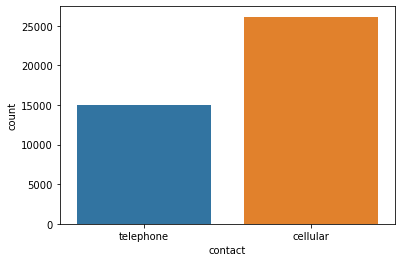

In [10]:
sns.countplot(data=df, x='contact')

In [11]:
df['job'].value_counts().index

Index(['admin.', 'blue-collar', 'technician', 'services', 'management',
       'retired', 'entrepreneur', 'self-employed', 'housemaid', 'unemployed',
       'student', 'unknown'],
      dtype='object')

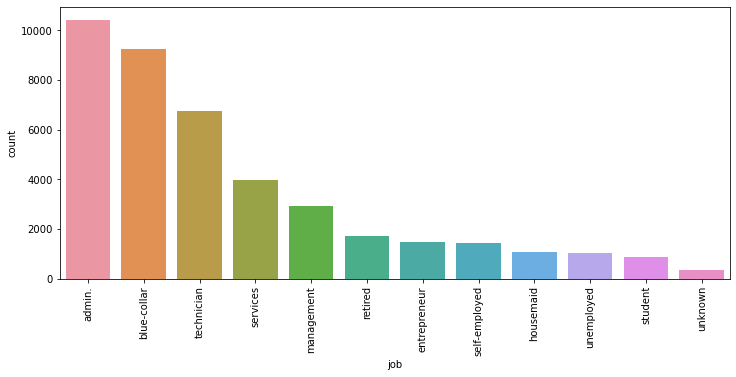

In [12]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.xticks(rotation=90);

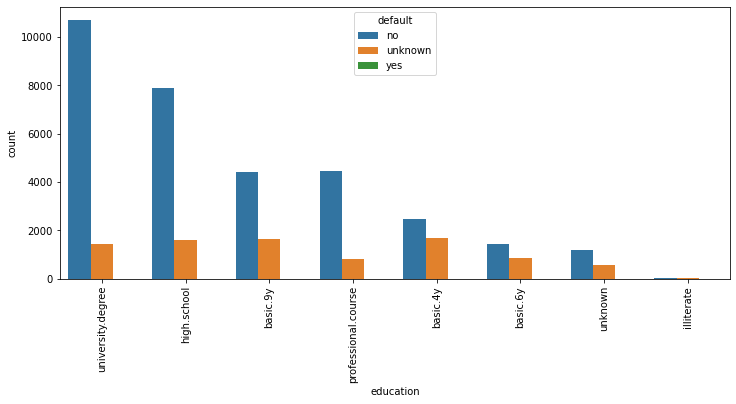

In [13]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='education', order=df['education'].value_counts().index, hue='default')
plt.xticks(rotation=90);

In [14]:
#sns.pairplot(data=df)

# ! on low-tier computer it may crush kernel.

In [15]:
# to 'work out' with numerical data we need use 'get dummies' cause we
# can't measure distance between 'admin.' and 'housewife' (but can between 0 and 1)

In [16]:
X = pd.get_dummies(df)

In [17]:
# We need to scaler all (to avoid distortion)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
scaled_X = scaler.fit_transform(X)

In [21]:
from sklearn.cluster import KMeans

In [22]:
# help(KMeans)

In [23]:
model = KMeans(n_clusters=2)

In [24]:
cluster_labels = model.fit_predict(scaled_X)

In [25]:
cluster_labels

array([1, 1, 1, ..., 0, 0, 0])

In [26]:
X['Claster'] = cluster_labels

In [27]:
# X

<AxesSubplot:>

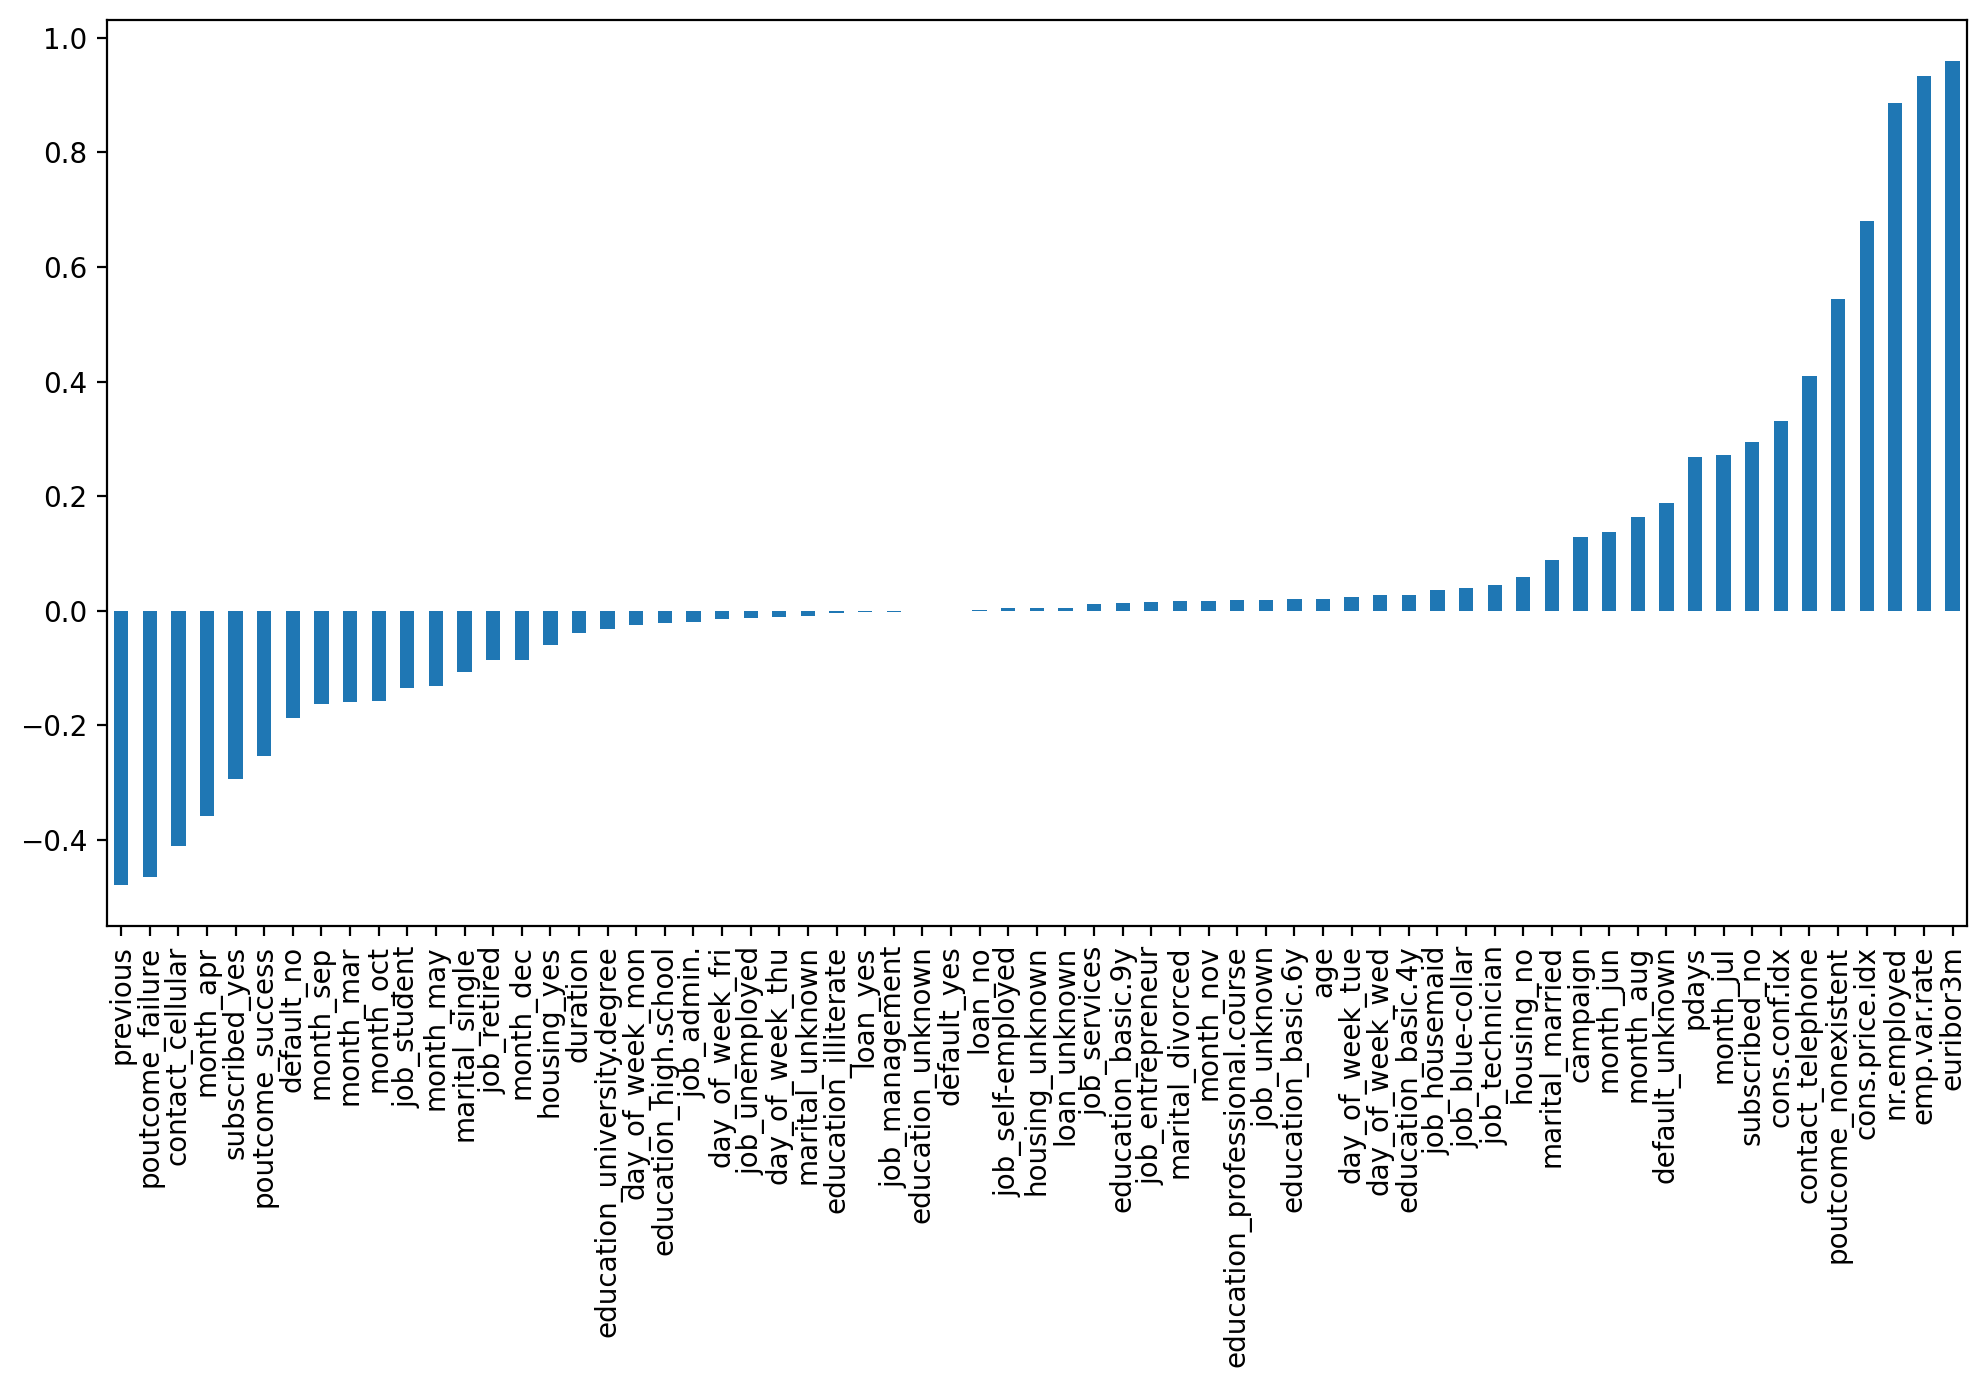

In [28]:
plt.figure(figsize=(12,6), dpi=200)

X.corr()['Claster'].iloc[:-1].sort_values().plot(kind='bar')

In [29]:
# choosing a K-value

In [30]:
ssd = []

for k in range(2,10):
    
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    
    ssd.append(model.inertia_) #ssd point assign to cluster center
    

In [31]:
ssd

[2469792.492062292,
 2370787.1536308606,
 2289348.8017847403,
 2219763.3827099954,
 2166803.4222420845,
 2111801.340659787,
 2049366.084920111,
 1986768.4410417818]

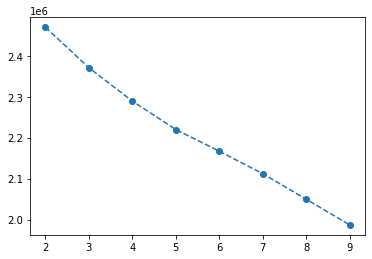

In [32]:
plt.plot(range(2,10), ssd, 'o--')

In [33]:
pd.Series(ssd)

0    2.469792e+06
1    2.370787e+06
2    2.289349e+06
3    2.219763e+06
4    2.166803e+06
5    2.111801e+06
6    2.049366e+06
7    1.986768e+06
dtype: float64

In [34]:
pd.Series(ssd).diff()
# calculate differences between previous row

0             NaN
1   -99005.338431
2   -81438.351846
3   -69585.419075
4   -52959.960468
5   -55002.081582
6   -62435.255740
7   -62597.643878
dtype: float64